# 라이브러리 로드

In [21]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# 분석 대상 아티스트 선정
* 2020년~2023년 상위 5개 앨범 총판매량 기록한 보이그룹 및 걸그룹 아티스트 대상으로 트렌드 지수 EDA 수행
* 써클차트 연도별 앨범 판매량 차트 기준
* 유닛 또는 솔로 아티스트 제외

In [4]:
artist_chart_info_df = pd.read_csv('album_chart_info_2020_2024.csv', index_col=0)
artist_chart_info_df['sales'] = artist_chart_info_df['sales'].map(lambda x: int(x.replace(',', '')))

artist_chart_info_df

,album,artist,sales,distribution,year
0,MAP OF THE SOUL : 7,방탄소년단,4376975,Dreamus,2020
1,BE,방탄소년단,2692022,Dreamus,2020
2,7th Mini Album `헹가래`,세븐틴,1377813,"지니뮤직, Stone Music Entertainment",2020
3,NCT RESONANCE Pt. 1 - The 2nd Album,NCT,1289594,Dreamus,2020
4,THE ALBUM,BLACKPINK,1244802,YG PLUS,2020
...,...,...,...,...,...
395,DARK BLOOD (Weverse),ENHYPEN,219724,"지니뮤직, Stone Music Entertainment",2023
396,1st Single Album `SECOND WIND` (Weverse),부석순 (SEVENTEEN),219551,YG PLUS,2023
397,Candy - Winter Special Mini Album (SMC),NCT DREAM,217190,Kakao Entertainment,2023
398,UNFORGIVEN (Weverse),LE SSERAFIM (르세라핌),215408,YG PLUS,2023


In [5]:
'''
    - 보이그룹: 세븐틴, 방탄소년단, Stray Kids, NCT DREAM, 투모로우바이투게더
    - 걸그룹: IVE, aespa, NewJeans, TWICE, BLACKPINK
'''
artist_album_sales_df = artist_chart_info_df.groupby('artist').sum()['sales'].to_frame().reset_index()
artist_album_sales_df.sort_values('sales', ascending=False).head(20)

,artist,sales
71,세븐틴,26015408
66,방탄소년단,21445773
34,Stray Kids (스트레이 키즈),18149661
22,NCT DREAM,14056304
109,투모로우바이투게더,10791996
21,NCT 127,10003198
10,ENHYPEN,8627804
3,ATEEZ (에이티즈),6912905
15,IVE (아이브),6479650
20,NCT,5995990


In [6]:
artist_list = ['세븐틴', '방탄소년단', 'Stray Kids (스트레이 키즈)', 'NCT DREAM', '투모로우바이투게더', 'IVE (아이브)', 'aespa', 'NewJeans', 'TWICE', 'BLACKPINK']

top5_artist_chart_info_df = artist_chart_info_df.query("artist == @artist_list").sort_values(['year', 'sales'], ascending=[True, False])
top5_artist_chart_info_df

,album,artist,sales,distribution,year
0,MAP OF THE SOUL : 7,방탄소년단,4376975,Dreamus,2020
1,BE,방탄소년단,2692022,Dreamus,2020
2,7th Mini Album `헹가래`,세븐틴,1377813,"지니뮤직, Stone Music Entertainment",2020
4,THE ALBUM,BLACKPINK,1244802,YG PLUS,2020
5,Special Album `; [Semicolon]`,세븐틴,1122850,Dreamus,2020
...,...,...,...,...,...
388,NOEASY,Stray Kids (스트레이 키즈),241710,Dreamus,2023
389,3RD ALBUM `An Ode`,세븐틴,234725,YG PLUS,2023
392,Candy - Winter Special Mini Album,NCT DREAM,227472,Kakao Entertainment,2023
393,4th Mini Album `Al1`,세븐틴,225173,Kakao Entertainment,2023


In [7]:
top5_artist_chart_info_df['distribution'].value_counts()

distribution
YG PLUS                            68
Dreamus                            45
Kakao Entertainment                16
지니뮤직, Stone Music Entertainment     2
Dreamus, The Orchard                1
Name: count, dtype: int64

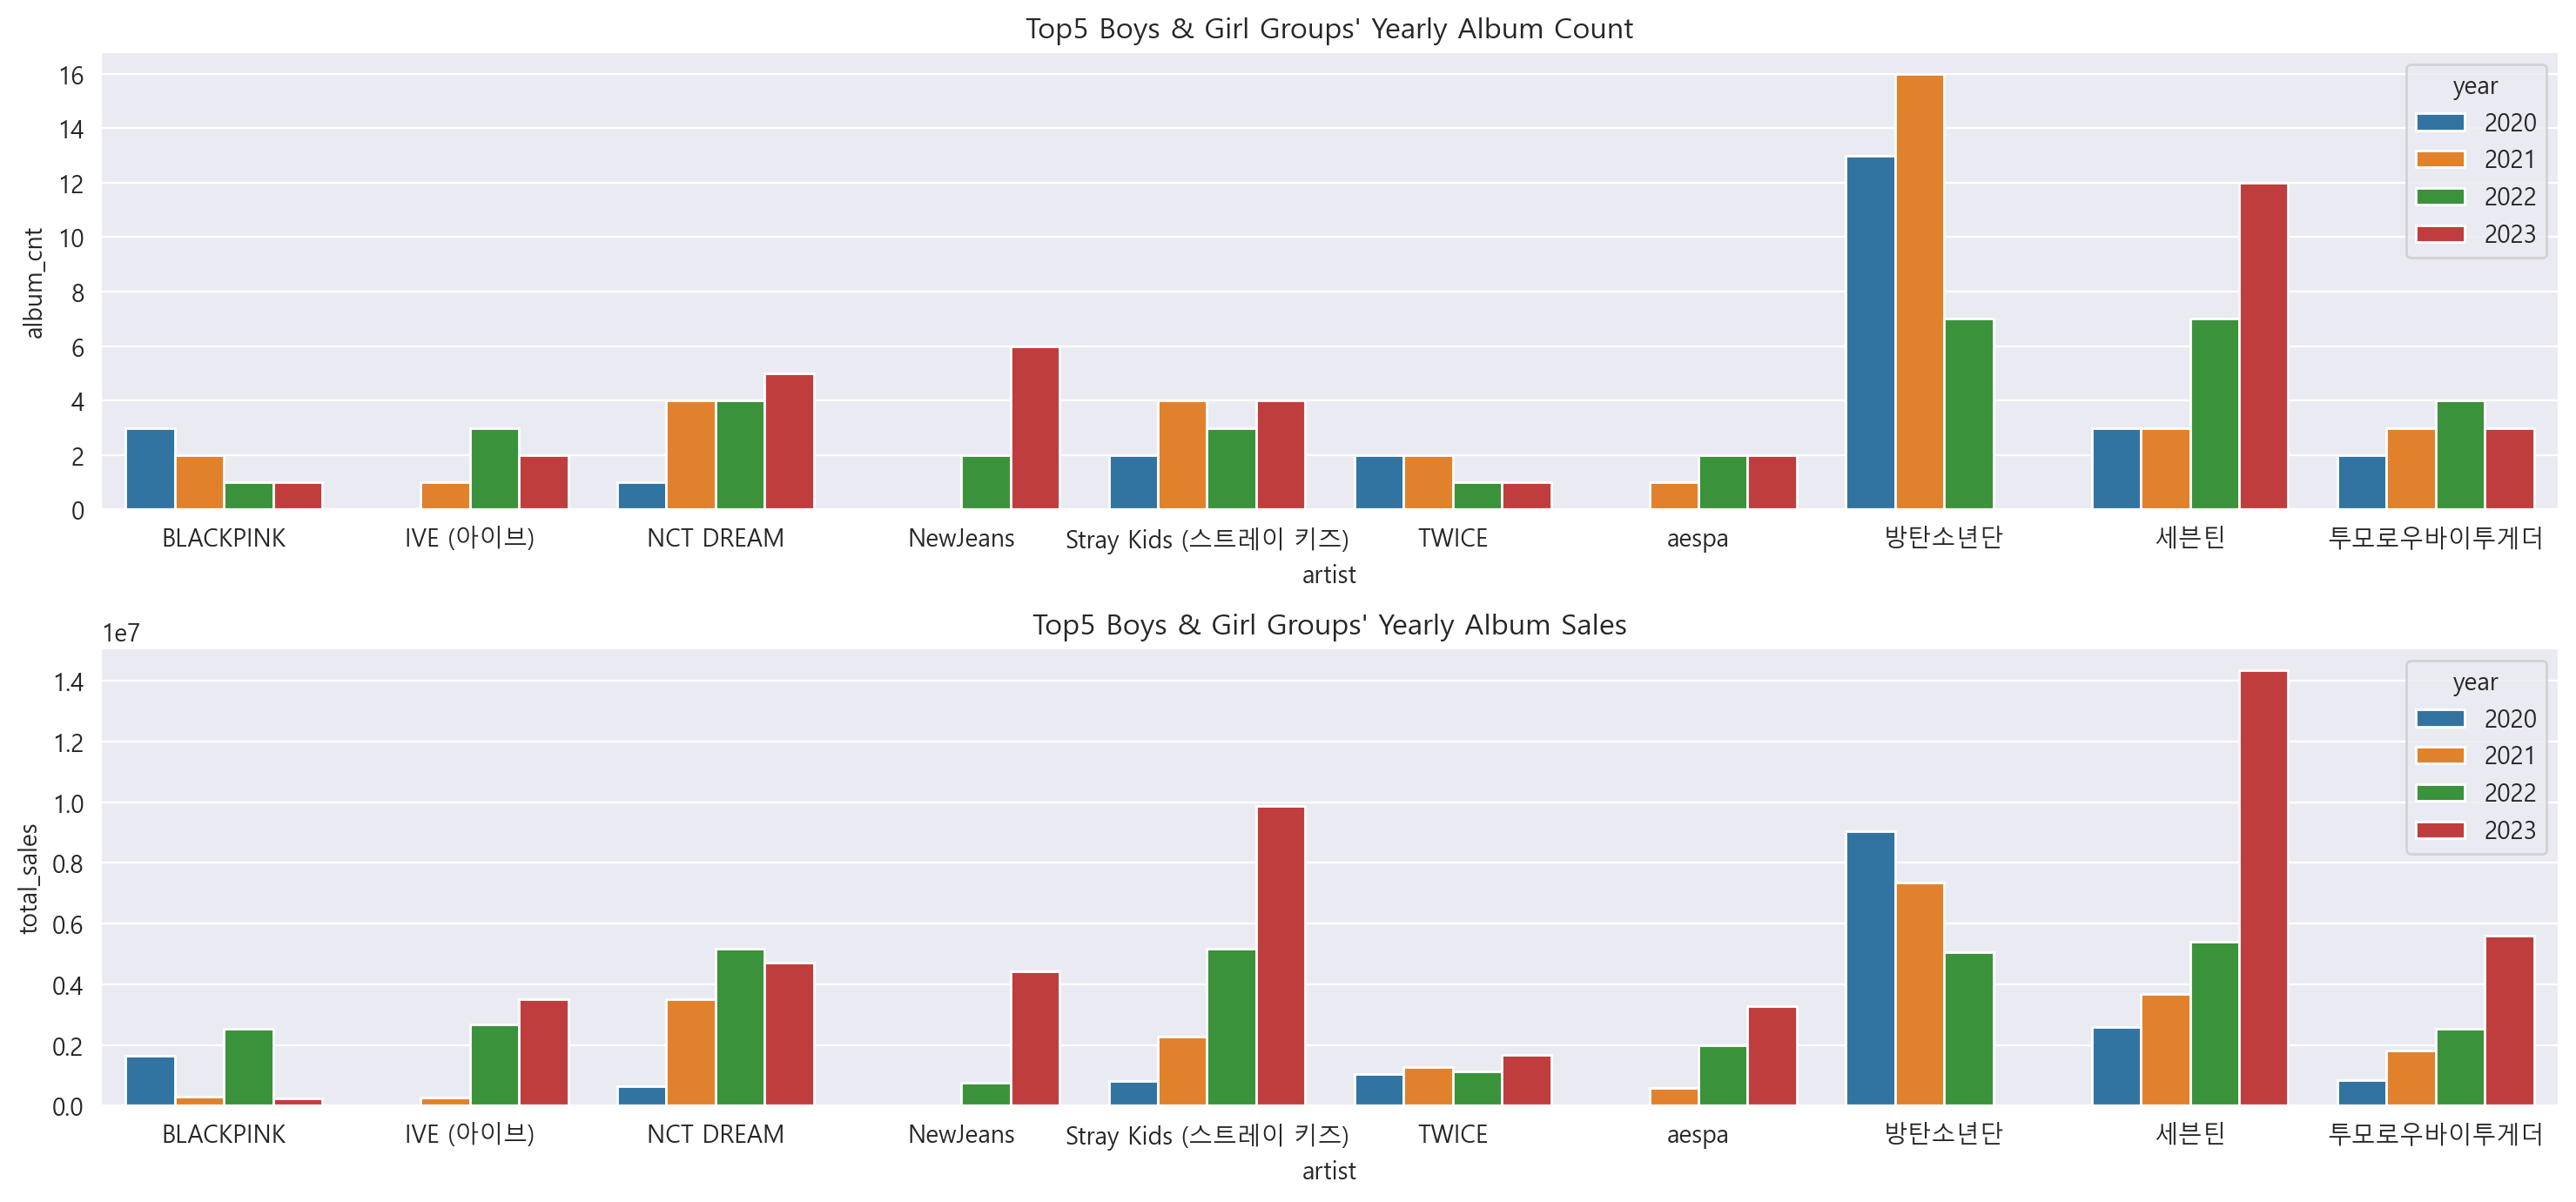

In [22]:
album_info_groupby_year = top5_artist_chart_info_df.groupby(['artist', 'year']).agg(album_cnt=('album', 'count'), total_sales=('sales', 'sum')).reset_index()

plt.figure(figsize=(15, 7))

plt.subplot(211)
sns.barplot(
    data=album_info_groupby_year,
    x='artist',
    y='album_cnt',
    hue='year',
    hue_order=[2020, 2021, 2022, 2023],
    palette='tab10'
)
plt.title("Top5 Boys & Girl Groups' Yearly Album Count")

plt.subplot(212)
sns.barplot(
    data=album_info_groupby_year,
    x='artist',
    y='total_sales',
    hue='year',
    hue_order=[2020, 2021, 2022, 2023],
    palette='tab10'
)
plt.title("Top5 Boys & Girl Groups' Yearly Album Sales")

plt.tight_layout()
plt.show()

# 아티스트 앨범 EDA

In [10]:
artist_album_df = pd.read_csv('top5_group_album_info.csv', index_col=0)
artist_album_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artist_name          244 non-null    object 
 1   artist_id            244 non-null    object 
 2   debut_date           244 non-null    object 
 3   artist_types         244 non-null    object 
 4   member_cnt           244 non-null    int64  
 5   sub_group_cnt        244 non-null    int64  
 6   label                223 non-null    object 
 7   album_id             244 non-null    object 
 8   album_name           244 non-null    object 
 9   album_type           244 non-null    object 
 10  release_date         244 non-null    object 
 11  main_genre           0 non-null      float64
 12  sub_genre            0 non-null      float64
 13  track_cnt            244 non-null    int64  
 14  avg_track_play_time  233 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usa

In [12]:
# 수집 안된 main_genre, sub_genre 제외
artist_album_df = artist_album_df.drop(['main_genre', 'sub_genre'], axis=1)
artist_album_df.head()

,artist_name,artist_id,debut_date,artist_types,member_cnt,sub_group_cnt,label,album_id,album_name,album_type,release_date,track_cnt,avg_track_play_time
0,SEVENTEEN,e04d239e-9fa8-49b3-b9b7-9e439c3cb1d1,2015-05-26,"['k-pop', 'boy band', 'boy group', '3rd gen k-...",13,5,PLEDIS Entertainment,b446e8da-fce3-4ebb-b2db-46a8f5252691,LOVE & LETTER,Album,2016-04-25,10,198800.000000
1,SEVENTEEN,e04d239e-9fa8-49b3-b9b7-9e439c3cb1d1,2015-05-26,"['k-pop', 'boy band', 'boy group', '3rd gen k-...",13,5,PLEDIS Entertainment,23aa9e36-19b8-43e5-9a4b-7588b9d66acd,"TEEN, AGE",Album,2017-11-06,13,179153.846154
2,SEVENTEEN,e04d239e-9fa8-49b3-b9b7-9e439c3cb1d1,2015-05-26,"['k-pop', 'boy band', 'boy group', '3rd gen k-...",13,5,PLEDIS Entertainment,9ad3e3f7-2878-4a59-91b4-9bfe08409a42,An Ode,Album,2019-09-16,11,195363.636364
3,SEVENTEEN,e04d239e-9fa8-49b3-b9b7-9e439c3cb1d1,2015-05-26,"['k-pop', 'boy band', 'boy group', '3rd gen k-...",13,5,PLEDIS Entertainment,45dcfc52-110c-4a79-ba59-6b73b5f56502,Face the Sun,Album,2022-05-27,9,194044.111111
4,SEVENTEEN,e04d239e-9fa8-49b3-b9b7-9e439c3cb1d1,2015-05-26,"['k-pop', 'boy band', 'boy group', '3rd gen k-...",13,5,PLEDIS Entertainment,3c45b936-1627-427a-b1f4-d1863220b3ce,17 HITS,Album,2016-10-21,16,196562.500000


In [15]:
boy_group = ['SEVENTEEN', 'BTS', 'Stray Kids', 'NCT DREAM', 'TOMORROW X TOGETHER']
girl_group = ['IVE', 'aespa', 'NewJeans', 'TWICE', 'BLACKPINK']

print(artist_album_df.query('artist_name == @boy_group')['album_type'].value_counts())
print('\n')
print(artist_album_df.query('artist_name == @girl_group')['album_type'].value_counts())

album_type
Single    63
Album     38
EP        22
Name: count, dtype: int64


album_type
Single       74
Album        29
Other        11
EP            5
Broadcast     2
Name: count, dtype: int64


# 트렌드 지수 추이 EDA

<가설>
* 특정 아티스트의 인기도는 구글 트렌드 지수로 정확하게 예측할 수 있다.
* 구글 트렌드 지수는 앨범 발매에 따른 특정 아티스트의 인기도 변동을 반영한다.

<수집 기간>
* 아티스트 별 정규, 디지털, EP 앨범에 한하여 앨범 발매 이전 1년, 이후 1개월